In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def preprocessing(data):
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)
    
    data.fillna(method='ffill', inplace=True)
    data.fillna(method='bfill', inplace=True)
    
    data['Volume'] = pd.to_numeric(data['Volume'], errors='coerce')

    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
    scaler = MinMaxScaler()

    data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

    return data

In [3]:
data = pd.read_csv('/kaggle/input/apple-daily-dataset/AAPL_day_new.csv')
apple_stock = preprocessing(data)
apple_stock

<ipython-input-2-80cb02926627>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
<ipython-input-2-80cb02926627>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)


,Open,High,Low,Close,Volume,SMA,EMA,RSI,MACD,MACD_Signal,BB_Upper,BB_Lower
Date,,,,,,,,,,,,
2010-01-04,0.002514,0.002193,0.002647,0.002613,0.253259,0.000000,0.000000,0.119505,0.413020,0.400512,0.001703,0.000896
2010-01-05,0.002653,0.002322,0.002751,0.002657,0.311488,0.000000,0.000000,0.119505,0.413020,0.400512,0.001703,0.000896
2010-01-06,0.002627,0.002279,0.002452,0.002251,0.284711,0.000000,0.000000,0.119505,0.413020,0.400512,0.001703,0.000896
2010-01-07,0.002313,0.001896,0.002248,0.002204,0.244324,0.000000,0.000000,0.119505,0.413020,0.400512,0.001703,0.000896
2010-01-08,0.002140,0.001896,0.002250,0.002371,0.228434,0.000000,0.000000,0.119505,0.413020,0.400512,0.001703,0.000896
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-30,0.922661,0.924035,0.918936,0.915375,0.017453,0.998379,0.982193,0.434400,0.246585,0.159486,0.948673,0.908999
2025-01-31,0.956418,0.949212,0.903969,0.909096,0.041900,0.999318,0.982031,0.407028,0.271446,0.175590,0.939876,0.912541
2025-02-03,0.888270,0.888786,0.873243,0.877544,0.026822,0.999318,0.980542,0.288293,0.251392,0.184039,0.935330,0.910801


In [4]:
macro_indexes = pd.read_csv('/kaggle/input/macro-indexes/macro_indexes.csv')
macro_indexes

,Unnamed: 0,10Y_Treasury_Yield,VIX,DXY_Index,Brent_Crude_Oil,WTI_Crude_Oil,Gold,GDP,CPI,PPI,Fed_Funds_Rate,M2_Money_Supply,Unemployment_Rate,Initial_Jobless_Claims,Consumer_Confidence_Index,Trade_Balance
0,2010-01-04,3.841,20.040001,77.529999,80.120003,81.510002,1117.699951,14764.610,217.488,181.900,0.11,8478.0,9.8,469000.0,74.4,-37744.0
1,2010-01-05,3.755,19.350000,77.620003,80.589996,81.769997,1118.099976,14764.610,217.488,181.900,0.11,8478.0,9.8,469000.0,74.4,-37744.0
2,2010-01-06,3.808,19.160000,77.489998,81.889999,83.180000,1135.900024,14764.610,217.488,181.900,0.11,8478.0,9.8,469000.0,74.4,-37744.0
3,2010-01-07,3.822,19.059999,77.910004,81.510002,82.660004,1133.099976,14764.610,217.488,181.900,0.11,8478.0,9.8,469000.0,74.4,-37744.0
4,2010-01-08,3.808,18.129999,77.470001,81.370003,82.750000,1138.199951,14764.610,217.488,181.900,0.11,8478.0,9.8,469000.0,74.4,-37744.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3792,2025-01-27,4.528,17.900000,107.339996,77.080002,73.169998,2737.500000,29719.647,319.086,257.302,4.33,21561.4,4.0,208000.0,71.7,-98431.0
3793,2025-01-28,4.551,16.410000,107.870003,77.489998,73.769997,2766.800049,29719.647,319.086,257.302,4.33,21561.4,4.0,208000.0,71.7,-98431.0
3794,2025-01-29,4.555,16.559999,108.000000,76.580002,72.620003,2769.100098,29719.647,319.086,257.302,4.33,21561.4,4.0,208000.0,71.7,-98431.0
3795,2025-01-30,4.512,15.840000,107.800003,76.870003,72.730003,2823.000000,29719.647,319.086,257.302,4.33,21561.4,4.0,208000.0,71.7,-98431.0


In [5]:
macro_indexes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3797 entries, 0 to 3796
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 3797 non-null   object 
 1   10Y_Treasury_Yield         3797 non-null   float64
 2   VIX                        3797 non-null   float64
 3   DXY_Index                  3797 non-null   float64
 4   Brent_Crude_Oil            3797 non-null   float64
 5   WTI_Crude_Oil              3797 non-null   float64
 6   Gold                       3797 non-null   float64
 7   GDP                        3797 non-null   float64
 8   CPI                        3797 non-null   float64
 9   PPI                        3797 non-null   float64
 10  Fed_Funds_Rate             3797 non-null   float64
 11  M2_Money_Supply            3797 non-null   float64
 12  Unemployment_Rate          3797 non-null   float64
 13  Initial_Jobless_Claims     3797 non-null   float

In [6]:
macro_indexes = pd.read_csv('/kaggle/input/macro-indexes/macro_indexes.csv')

macro_indexes = macro_indexes.rename(columns={'Unnamed: 0': 'Date'})
macro_indexes['Date'] = pd.to_datetime(macro_indexes['Date'])
macro_indexes.set_index('Date', inplace=True)
macro_indexes

,10Y_Treasury_Yield,VIX,DXY_Index,Brent_Crude_Oil,WTI_Crude_Oil,Gold,GDP,CPI,PPI,Fed_Funds_Rate,M2_Money_Supply,Unemployment_Rate,Initial_Jobless_Claims,Consumer_Confidence_Index,Trade_Balance
Date,,,,,,,,,,,,,,,
2010-01-04,3.841,20.040001,77.529999,80.120003,81.510002,1117.699951,14764.610,217.488,181.900,0.11,8478.0,9.8,469000.0,74.4,-37744.0
2010-01-05,3.755,19.350000,77.620003,80.589996,81.769997,1118.099976,14764.610,217.488,181.900,0.11,8478.0,9.8,469000.0,74.4,-37744.0
2010-01-06,3.808,19.160000,77.489998,81.889999,83.180000,1135.900024,14764.610,217.488,181.900,0.11,8478.0,9.8,469000.0,74.4,-37744.0
2010-01-07,3.822,19.059999,77.910004,81.510002,82.660004,1133.099976,14764.610,217.488,181.900,0.11,8478.0,9.8,469000.0,74.4,-37744.0
2010-01-08,3.808,18.129999,77.470001,81.370003,82.750000,1138.199951,14764.610,217.488,181.900,0.11,8478.0,9.8,469000.0,74.4,-37744.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-27,4.528,17.900000,107.339996,77.080002,73.169998,2737.500000,29719.647,319.086,257.302,4.33,21561.4,4.0,208000.0,71.7,-98431.0
2025-01-28,4.551,16.410000,107.870003,77.489998,73.769997,2766.800049,29719.647,319.086,257.302,4.33,21561.4,4.0,208000.0,71.7,-98431.0
2025-01-29,4.555,16.559999,108.000000,76.580002,72.620003,2769.100098,29719.647,319.086,257.302,4.33,21561.4,4.0,208000.0,71.7,-98431.0


In [7]:
combined_data = pd.merge(apple_stock, macro_indexes,  left_index=True, right_index=True, how='inner')
print(combined_data.shape)

(3794, 27)


In [8]:
combined_data.to_csv('combined_data.csv')

In [9]:
correlation_matrix = combined_data.corr()
stock_macro_corr = correlation_matrix.loc['Close', macro_indexes.columns]
sorted_corr = stock_macro_corr.abs().sort_values(ascending=False)

In [10]:
print("Кореляція між ціною закриття акції та макроекономічними індикаторами:")
print(stock_macro_corr[sorted_corr.index])

Кореляція між ціною закриття акції та макроекономічними індикаторами:
CPI                          0.965408
GDP                          0.959284
M2_Money_Supply              0.941056
Trade_Balance               -0.912731
PPI                          0.876885
Gold                         0.847130
Fed_Funds_Rate               0.727245
DXY_Index                    0.698965
Unemployment_Rate           -0.498837
Consumer_Confidence_Index   -0.452895
10Y_Treasury_Yield           0.382593
VIX                          0.085717
Brent_Crude_Oil             -0.069191
Initial_Jobless_Claims      -0.040434
WTI_Crude_Oil                0.002355
Name: Close, dtype: float64


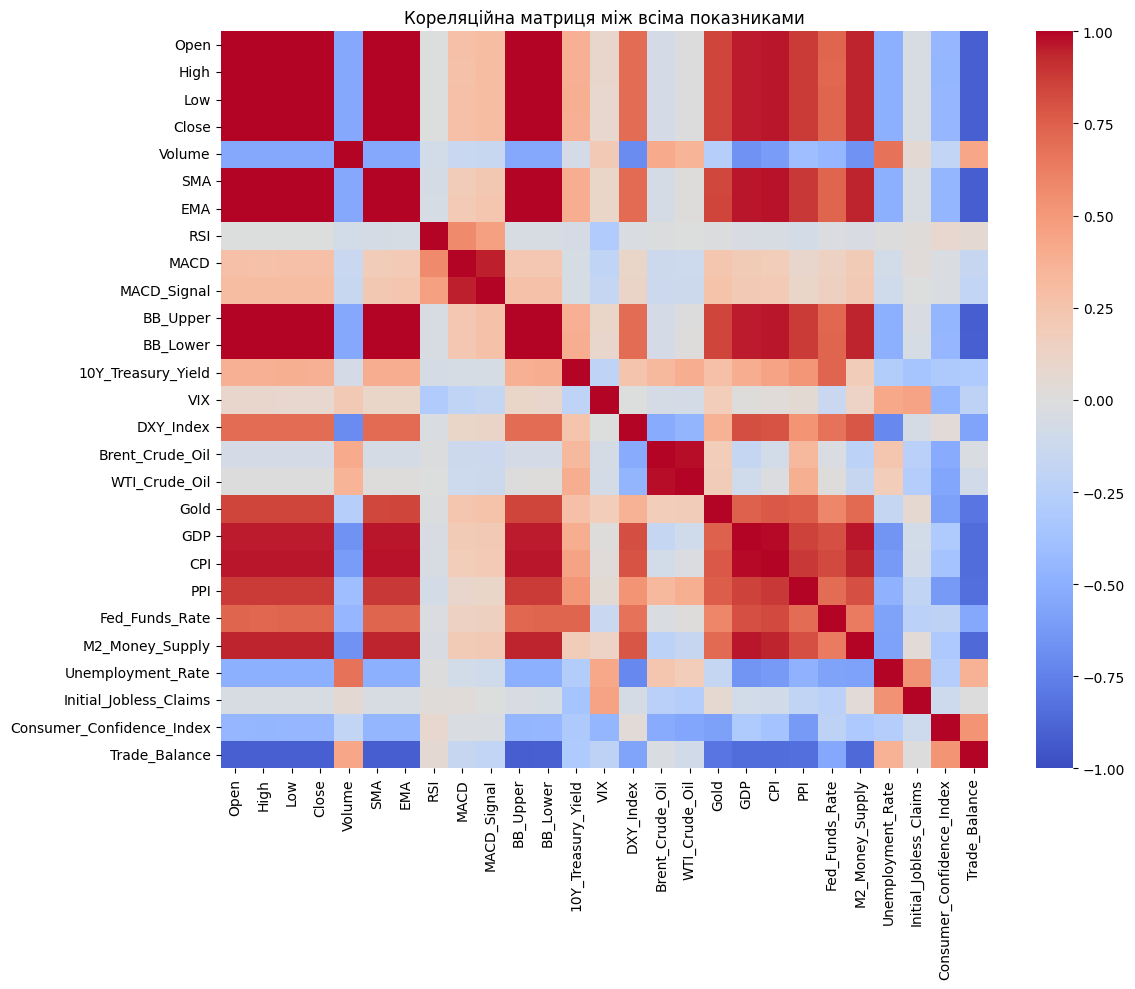

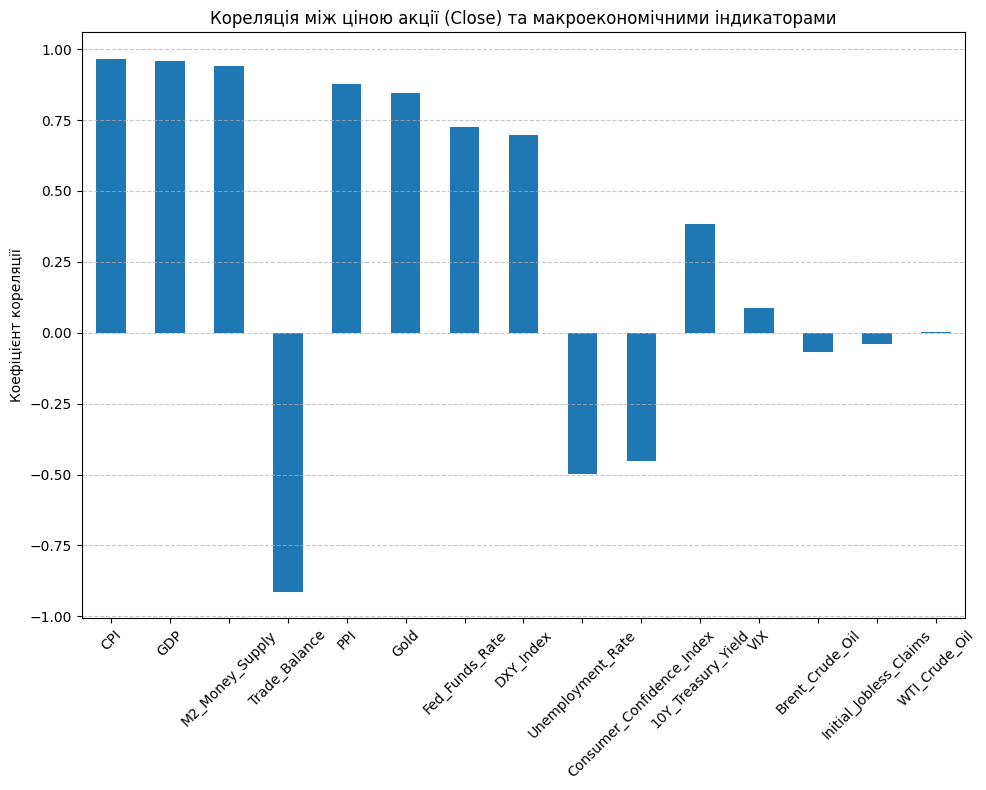

In [11]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Кореляційна матриця між всіма показниками')
plt.tight_layout()
plt.savefig('full_correlation.png')
plt.show()


plt.figure(figsize=(10, 8))
stock_macro_corr[sorted_corr.index].plot(kind='bar')
plt.title('Кореляція між ціною акції (Close) та макроекономічними індикаторами')
plt.ylabel('Коефіцієнт кореляції')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('stock_macro_correlation.png')
plt.show()

#  CPI, GDP, M2 Money Supply, PPI, Gold

In [12]:
cols = ['CPI', 'GDP', 'M2_Money_Supply', 'PPI', 'Gold']
best_lags = {}

for col in cols:
    best_corr, best_lag = 0, 0
    
    for lag in range(0, 360):
        shifted = macro_indexes[col].shift(lag)  
        corr = shifted.corr(apple_stock['Close'])  
        
        if abs(corr) > abs(best_corr):  
            best_corr, best_lag = corr, lag
    
    best_lags[col] = (best_lag, best_corr)


for ind, (lag, corr) in best_lags.items():
    print(f'Індекс: {ind}, Оптимальний лаг: {lag} днів, Кореляція: {corr:.4f}')

Індекс: CPI, Оптимальний лаг: 0 днів, Кореляція: 0.9654
Індекс: GDP, Оптимальний лаг: 0 днів, Кореляція: 0.9593
Індекс: M2_Money_Supply, Оптимальний лаг: 166 днів, Кореляція: 0.9482
Індекс: PPI, Оптимальний лаг: 0 днів, Кореляція: 0.8769
Індекс: Gold, Оптимальний лаг: 0 днів, Кореляція: 0.8471


# Fed Funds Rate, DXY Index, Trade Balance, Unemployment Rate

In [13]:
cols = ['Fed_Funds_Rate', 'DXY_Index', 'Trade_Balance', 'Unemployment_Rate']
best_lags = {}

for col in cols:
    best_corr, best_lag = 0, 0
    
    for lag in range(0, 360):
        shifted = macro_indexes[col].shift(lag)  
        corr = shifted.corr(apple_stock['Close'])  
        
        if abs(corr) > abs(best_corr):  
            best_corr, best_lag = corr, lag
    
    best_lags[col] = (best_lag, best_corr)


for ind, (lag, corr) in best_lags.items():
    print(f'Індекс: {ind}, Оптимальний лаг: {lag} днів, Кореляція: {corr:.4f}')

Індекс: Fed_Funds_Rate, Оптимальний лаг: 0 днів, Кореляція: 0.7272
Індекс: DXY_Index, Оптимальний лаг: 0 днів, Кореляція: 0.6990
Індекс: Trade_Balance, Оптимальний лаг: 0 днів, Кореляція: -0.9127
Індекс: Unemployment_Rate, Оптимальний лаг: 0 днів, Кореляція: -0.4988


In [15]:
macro_indexes['M2_Money_Supply_Lagged'] = macro_indexes['M2_Money_Supply'].shift(166)
macro_indexes['M2_Money_Supply_Lagged'] = macro_indexes['M2_Money_Supply_Lagged'].ffill()
macro_indexes['M2_Money_Supply_Lagged'] = macro_indexes['M2_Money_Supply_Lagged'].bfill()
macro_indexes.drop('M2_Money_Supply', axis=1)

,10Y_Treasury_Yield,VIX,DXY_Index,Brent_Crude_Oil,WTI_Crude_Oil,Gold,GDP,CPI,PPI,Fed_Funds_Rate,Unemployment_Rate,Initial_Jobless_Claims,Consumer_Confidence_Index,Trade_Balance,M2_Money_Supply_Lagged
Date,,,,,,,,,,,,,,,
2010-01-04,3.841,20.040001,77.529999,80.120003,81.510002,1117.699951,14764.610,217.488,181.900,0.11,9.8,469000.0,74.4,-37744.0,8478.0
2010-01-05,3.755,19.350000,77.620003,80.589996,81.769997,1118.099976,14764.610,217.488,181.900,0.11,9.8,469000.0,74.4,-37744.0,8478.0
2010-01-06,3.808,19.160000,77.489998,81.889999,83.180000,1135.900024,14764.610,217.488,181.900,0.11,9.8,469000.0,74.4,-37744.0,8478.0
2010-01-07,3.822,19.059999,77.910004,81.510002,82.660004,1133.099976,14764.610,217.488,181.900,0.11,9.8,469000.0,74.4,-37744.0,8478.0
2010-01-08,3.808,18.129999,77.470001,81.370003,82.750000,1138.199951,14764.610,217.488,181.900,0.11,9.8,469000.0,74.4,-37744.0,8478.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-27,4.528,17.900000,107.339996,77.080002,73.169998,2737.500000,29719.647,319.086,257.302,4.33,4.0,208000.0,71.7,-98431.0,21079.2
2025-01-28,4.551,16.410000,107.870003,77.489998,73.769997,2766.800049,29719.647,319.086,257.302,4.33,4.0,208000.0,71.7,-98431.0,21079.2
2025-01-29,4.555,16.559999,108.000000,76.580002,72.620003,2769.100098,29719.647,319.086,257.302,4.33,4.0,208000.0,71.7,-98431.0,21079.2


In [19]:
new_macro_indexes = macro_indexes[['Fed_Funds_Rate', 'DXY_Index', 'Trade_Balance', 'Unemployment_Rate', 'CPI', 'GDP', 'M2_Money_Supply_Lagged', 'PPI', 'Gold']]
new_combined_data = pd.merge(apple_stock, new_macro_indexes,  left_index=True, right_index=True, how='inner')
print(new_combined_data)

                Open      High       Low     Close    Volume       SMA  \
Date                                                                     
2010-01-04  0.002514  0.002193  0.002647  0.002613  0.253259  0.000000   
2010-01-05  0.002653  0.002322  0.002751  0.002657  0.311488  0.000000   
2010-01-06  0.002627  0.002279  0.002452  0.002251  0.284711  0.000000   
2010-01-07  0.002313  0.001896  0.002248  0.002204  0.244324  0.000000   
2010-01-08  0.002140  0.001896  0.002250  0.002371  0.228434  0.000000   
...              ...       ...       ...       ...       ...       ...   
2025-01-27  0.864617  0.890045  0.866414  0.884850  0.038556  0.995164   
2025-01-28  0.891678  0.921674  0.893529  0.918021  0.028245  0.996362   
2025-01-29  0.904633  0.920376  0.906232  0.922364  0.011978  0.997579   
2025-01-30  0.922661  0.924035  0.918936  0.915375  0.017453  0.998379   
2025-01-31  0.956418  0.949212  0.903969  0.909096  0.041900  0.999318   

                 EMA       RSI      M

In [20]:
combined_data.to_csv('new_combined_data.csv')